# Programming for Data Analysis Project 2020

## Table of contents
1. [Introduction](#introduction)

2. [Factors](#factors)

    2.1 [Income](#income)
    
    2.2 [Cognitive Ability](#cognitive_ability)
    
    2.3 [Big Five Personality Traits](#big_five)
    
    2.4 [Gender](#gender)
    
3. [Simulation](#simulation)

    3.1. [Correlation matrix](#correlation)
    
    3.2. [Covariance Matrix](#covariance)
    
    3.3. [Generation of Dataset](#dataset)
    
    3.4. [Classification of Income](#class)
    
    3.5. [Details on dataset](#details)
    
    3.6. [Visualisation](#visualisation)
    
4. [References](#references)

## 1 Introduction <a name="introduction"></a>
The purpose of this project is to simulate a dataset which represents income in the United States and the various factors that are associated with same. In this instance, the factors are cognitive ability and personality (Big Five traits Openness, Conscientiousness, Extraversion, Agreeableness and Neuroticism). In addition, the relationship between gender and income will be investigated.

The study of the distribution of Income and the factors that correlate with it are of interest because of questions concerning income equality and how much of success is due to so called "fair" factors such as personality and cognitive ability and "unfair" factors such as parental wealth and social status.

Each of the factors and their distribution are described as follows:

## 2 Factors <a name="factors"></a>

## 2.1 Income <a name="income"></a>
The factor that is of primary concern in this simulation is total lifetime income in the United States (called **I** for convenience here). The aim of the project is to simulate a distribution of total lifetime income given the mean and standard deviation of total lifetime income given in the paper "Who Does Well in Life? Conscientious Adults Excel in Both Objective and Subjective Success" [1](#ref1).

Generally, income (including lifetime income) is best described using the lognormal distribution as the mode tends to be less than the median which is less than the mean (reflecting income equality). However, due to the earnings were capped at a taxable maximum in the paper, the data is not sufficiently skewed to justify the transformation and can be modelled as a normal distribution.

The mean and standard deviation are 980,000 and 738,000 respectively.

In [79]:
m_i = 980000
stdev_i = 738000

## 2.2 Cognitive ability <a name="cognitive_ability"></a>
Cognitive ability as measured by the paper includes memory, vocabulary and numeracy. It correlates positively with income. These measures (in particular vocabulary) correlate very highly with IQ [2](#ref2). IQ is measured initially on an ordinal scale with percentiles but is approximated on the interval scale as a normal distribution or bell curve across a whole population [3](#ref3). Cognitive ability correlates positively with income.

In the paper, the mean and standard deviation are 0 and 1. It is normally distributed like IQ (although IQ usually has mean 100 and standard deviation 15).

In [80]:
m_ca = 0
stdev_ca = 1

## 2.3 Big Five Personality Traits <a name="big_five"></a>
The Big Five Personaltiy traits are an attempt by psychologists to encapsulate and quantify several personality traits [4](#ref4). They traits are similar to IQ in that they are measured on the ordinal scale by psychologists but approximated on the interval scale as a normal distribution across a whole population [5](#ref5). The traits are measured on a scale where 4 means an individual scores extremely high in a trait, 1 means they score extremely low in a trait and 2 means the individual scores neither high nor low in a trait.
The Big Five traits are Openness, Conscientiousness, Extraversion, Agreeableness and Emotional Stability/Neuroticism (the facets and domains of the Big Five are not considered here). The mean and standard deviations are drawn from the paper.
### 2.3.1 Openness <a name="openness"></a>
Openness measures the level of interest in art, intellectual pursuits and creativity in an individual. It also measures how unconventional and fantasy-prone they are. It correlates positively with income. The mean is 1.95 and the standard deviation is 0.55. 
### 2.3.2 Conscientiousness <a name="conscientiousness"></a>
Conscientiousness measures how industrious, organised and self-disciplined an individual is. It also measures how cautious and dutiful they are. It correlates positively with income. The mean is 2.56 and the standard deviation is 0.48.
### 2.3.3 Extraversion <a name="extraversion"></a>
Extraversion measures how talkative, assertive and sensation-seeking an individual is. It also measures thier level of activity and positive emotions. It correlates negatively with income. The mean is 2.2 and 0.55.
### 2.3.4 Agreeableness <a name="agreeableness"></a>
Extraversion measures how modest, altruistic and honest an individual is. It also measures how compassionate  and trusting they are. It correlates negatively with income. The mean is 2.53 and the standard deviation is 0.47.
### 2.3.5 Emotional Stability/Neuroticism <a name="emotional stability"></a>
Emotional stability is the reverse of Neuroticism. Neuroticism measures how anxious, fearful and depressed an individual is. It also measures how self-conscious and impulsive they are. It correlates negatively with Income, whereas its reverse Emotional Stability correlates positively with income. The mean (of Emotional Stability) is 2.71 and the standard deviation is 0.61.

In [81]:
# means of big five traits
m_o = 1.95
m_c = 2.56
m_e = 2.2
m_a = 2.53
m_es = 2.71
# standard deviationns of big five traits
stdev_o = 0.55
stdev_c = 0.48
stdev_e = 0.55
stdev_a = 0.47
stdev_es = 0.61

## 2.4 Gender <a name="gender"></a>
Gender, as defined in this project, is whether the individual identified as male or female. Since this project's purpose is to generate a dataset which correlates with total lifetime income, the expectation is that men's lifetime income will dwarf women's lifetime income as for much of the 20th century men were the sole breadwinners of households, in the United States and in other industrialised nations [6](#ref6).

In this project, it will be represented as a categorical variable which can be 'M' or 'F'. It will be generated by taking the income brackets, getting the probability of a given individual being in that bracket if they're male and female and generating a '1' or '0' from the binomial distribution which will then be used  as 'M' or 'F' respectively.

# 3 Simulation <a name="simulation"></a>
## 3.1 Correlation Matrix <a name="correlation"></a>
Since all the factors correlate with income (and most the factors also correlate with each other to some degree), the multivariate normal distribution is used to generate the dataset [7](#ref7). The correlation matrix used in the multivariate normal distribution is entered using the correlations from the paper (the pretty_print_matrix function is taken from Stack Overflow [8](#ref8))

In [82]:
# this function prints out a matrix in 
# a presentable fashion
# taken from Stack Overflow
def pretty_print_matrix(matrix):
    s = [[str(e) for e in row] for row in matrix]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))

# rows of correlation matrix
p1= [1, 0.67, 0.61, 0.63, 0.23, 0.27, 0.08]
p2 = [0.67, 1, 0.68, 0.51, 0.2, 0.27, 0.1]
p3 = [0.61, 0.68, 1, 0.8, 0.25, 0.01, -0.04]
p4 = [0.63, 0.51, 0.8, 1, 0.07, 0.02, -0.14]
p5 = [0.23, 0.20, 0.25, 0.07, 1, 0.16, 0.16]
p6 = [0.27, 0.27, 0.01, 0.02, 0.16, 1, 0.34]
p7 = [0.08, 0.10, -0.04, -0.14, 0.16, 0.34, 1]

# correlation matrix
corr = [p1, p2, p3, p4, p5, p6, p7]
pretty_print_matrix(corr)

1   	0.67	0.61 	0.63 	0.23	0.27	0.08 
0.67	1   	0.68 	0.51 	0.2 	0.27	0.1  
0.61	0.68	1    	0.8  	0.25	0.01	-0.04
0.63	0.51	0.8  	1    	0.07	0.02	-0.14
0.23	0.2 	0.25 	0.07 	1   	0.16	0.16 
0.27	0.27	0.01 	0.02 	0.16	1   	0.34 
0.08	0.1 	-0.04	-0.14	0.16	0.34	1    


## 3.2 Generation of dataset <a name="covariance"></a>
This correlation matrix is used to generate a standardised version of the dataset [9](#ref9) using the multivariate_normal function. Standardised means that the mean of each column is 0 and the standard deviation is 1. 

The code to do this is as follows:

In [83]:
# import numpy for numpy arrays
import numpy as np
# set precision of numpy
np.set_printoptions(precision=3)

# mean and standard deviation lists
mean_list = [m_c, m_o, m_e, m_a, m_es, m_ca, m_i]
std_list = [stdev_c, stdev_o, stdev_e, stdev_a, stdev_es, stdev_ca, stdev_i]

# numpy arrays of mean and 
# standard deviation lists
m = np.array(mean_list)
s = np.array(std_list)

# numpy array of correlation matrix
R = np.array(corr)

# list of 0's for means
mean_zeros = np.array([0,0,0,0,0,0,0])

# standardised version of dataset, means are all 0 and
# correlation matrix is used as covariance matrix.
#standard_dataset = np.random.multivariate_normal(mean_zeros, corr, 200)
standard_dataset = np.random.multivariate_normal(mean_zeros, corr, 200)

## 3.3 Reverse standardisation <a name="dataset"></a>
The dataset is adjusted so that the means and standard deviations reflect the assigned means and standard deviations given above instead of 0 and 1. This is done by taking the standardisation formula standard_datset = (dataset - mean)/(standard_deviation) and reversing it to get the dataset variable, like so: dataset = standard_dataset*standard_deviation + mean.

This is an alternate way of generating the dataset using multivariate_normal. A more regular method is to use the covariance matrix to generate the final dataset instead. This method is more complex and error-prone, so this alternate method is used instead.

First, a pandas dataframe of the standard dataset is created:

In [84]:
# import pandas as pd
import pandas as pd
# set precision to 3
pd.set_option("display.float_format", lambda x: '%.3f' % x)

# dataframe df of dataset
df = pd.DataFrame(standard_dataset, columns =['Conscientiousness', 'Openness', 'Extraversion', \
                                     'Agreeableness', 'Emotional Stability', \
                                     'Cognitive Ability', 'Income']);

The reverse standardisation is given as follows:

In [85]:
# create new non-standard dataset
df_new = df*s + m

# check by using the standardisation formula
# to get original dataset
df_old = (df_new - m)/s

# get mean and standard deviation of df_old
# should be 0.
print((df_old - df).mean())
print((df_old - df).std())

Conscientiousness     -0.000
Openness               0.000
Extraversion          -0.000
Agreeableness         -0.000
Emotional Stability   -0.000
Cognitive Ability      0.000
Income                -0.000
dtype: float64
Conscientiousness     0.000
Openness              0.000
Extraversion          0.000
Agreeableness         0.000
Emotional Stability   0.000
Cognitive Ability     0.000
Income                0.000
dtype: float64


This confirms that the reverse standardisation was successful.

The correlation matrix of the final, unstandardised version of the dataset is compared with the correlation matrix of the original, standardised dataset as follows:

In [86]:
df_old.corr() - df_new.corr()

,Conscientiousness,Openness,Extraversion,Agreeableness,Emotional Stability,Cognitive Ability,Income
Conscientiousness,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000
Openness,-0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000
Extraversion,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000
Agreeableness,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000
Emotional Stability,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Cognitive Ability,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000
Income,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000


All the entries are 0. This confirms that the correlations remain intact after the reverse standardisation has taken place.

The final, non-standardised version of the dataset has been generated. df_new is assigned to df:

In [87]:
df = df_new

## 3.4 Classification <a name="class"></a>
To classify each income range, a very simple classification scheme is used whereby incomes in 98th percentile are categorised as "H" for High, incomes above the 84th percentile and below and equalling the 98th percentile are categorised as "HM" for High Middle, incomes above the 50th percentile and below and equalling the 84th percentile are categories as "LM", incomes above the 16th percentile and below and equalling the 50th percentile are categorised as "HL" for High Low, incomes between the 2nd percentile and below and equalling the 16th percentile are categorised as "LM" for Low Middle and incomes at or below the 2th percentile are categorised as "L" for low. 

This classification scheme is done as follows:

In [88]:
# Different classes of income
# A small increment of 0.000000001 is made
# to ensure the income brackets conform
# to the scheme outlined above
df.loc[df['Income'] > m_i + 2*stdev_i, 'Income Class'] = 'H' 
df.loc[df['Income'].between(m_i + stdev_i +0.000000001, m_i + 2*stdev_i, inclusive=True), 'Income Class'] = 'HM' 
df.loc[df['Income'].between(m_i +0.000000001, m_i + stdev_i, inclusive=True), 'Income Class'] = 'LM' 
df.loc[df['Income'].between(m_i - stdev_i +0.000000001 , m_i, inclusive=True), 'Income Class'] = 'HL' 
df.loc[df['Income'].between(m_i - 2*stdev_i +0.000000001 ,m_i-stdev_i, inclusive=True), 'Income Class'] = 'ML'
df.loc[df['Income'] <= m_i - 2*stdev_i, 'Income Class'] = 'L'

These income brackets can be used to estimate the probability of a particular row being male or female. This is done in the following section.

## 3.4 Gender <a name="class"></a>
The paper referenced previously is controlled for gender. However, the mean and standard deviation of lifetime incomes for men and women are present in another paper studying education, gender and lifetime income [10](#ref10). By calculating the probability of being in a certain income bracket, given that you're a man, one can calculate the the probability of being a man given that you''re in that income bracket.

First, the former probabilities are calculated for each bracket:

In [134]:
# the lifetime income of men and women by education bracket (in millions)
men =  [3.05, 2.43, 1.76, 1.54, 1.13]
women =  [1.86, 1.43, 1.01, 0.8, 0.51]
# total
total = men + women

# distributions fo rmen and women
men_dist = np.random.normal(np.mean(men), np.std(men), 1000000)
women_dist = np.random.normal(np.mean(women), np.std(women), 1000000)

# Higher income bracket
prop_men_H = np.sum(men_dist> (np.mean(total) + 2*np.std(total)))
prop_women_H = np.sum(women_dist> (np.mean(total) + 2*np.std(total)))

# proportion of men in this bracket
men_H = (prop_men_H)/(prop_men_H + prop_women_H)
print("Probability of being in highest income bracket, given that you're a man: {:.2f}%".format(100*men_H))

# Higher middle income bracket
a = (np.mean(total) + 2*np.std(total))
b =  (np.mean(total) +np.std(total) + 0.00001)
prop_men_HM = np.sum(men_dist[(men_dist <= a) & (men_dist >= b)]) 
prop_women_HM = np.sum(women_dist[(women_dist <= a) & (women_dist >=b)]) 
                      
# proportion of men in this bracket
men_HM = (prop_men_HM)/(prop_men_HM + prop_women_HM)
print("Probability of being in the higher middle income bracket, given that you're a man: {:.2f}%".format(100*men_HM))

# Lower middle income bracket
a = (np.mean(total) + np.std(total))
b = (np.mean(total) + 0.00001)
prop_men_LM = np.sum(men_dist[(men_dist <= a) & (men_dist >= b)]) 
prop_women_LM = np.sum(women_dist[(women_dist <= (np.mean(total) + np.std(total))) & (women_dist >= (np.mean(total) + 0.00001))]) 

# proportion of men in this bracket
men_LM = (prop_men_LM)/(prop_men_LM + prop_women_LM)
print("Probability of being in the lower middle income bracket, given that you're a man: {:.2f}%".format(100*men_LM))

# Higher lower income bracket
a = (np.mean(total))
b = (np.mean(total) -np.std(total) + 0.00001)
prop_men_HL = np.sum(men_dist[(men_dist <= a) & (men_dist >= b)])
prop_women_HL = np.sum(women_dist[(women_dist <= (np.mean(total))) & (women_dist >= (np.mean(total) -np.std(total) + 0.00001))])

# proportion of men in this bracket
men_HL = (prop_men_HL)/(prop_men_HL + prop_women_HL)
print("Probability of being in the higher lower income bracket, given that you're a man: {:.2f}%".format(100*men_HL))

# Middle lower income bracket
a = (np.mean(total)-np.std(total))
b = (np.mean(total) -2*np.std(total)  + 0.00001)
prop_men_ML = np.sum(men_dist[(men_dist <= a) & (men_dist >= b)])
prop_women_ML = np.sum(women_dist[(women_dist <= a) & (women_dist >= b)])

# proportion of men in this bracket
men_ML = (prop_men_ML)/(prop_men_ML + prop_women_ML)
print("Probability of being in the middle lower income bracket, given that you're a man: {:.2f}%".format(100*men_ML))

# Lower income bracket
prop_men_L = np.sum(men_dist < (np.mean(total) - 2*np.std(total)))
prop_women_L = np.sum(women_dist < (np.mean(total) - 2*np.std(total)))

# proportion of men in this bracket
men_L = (prop_men_L)/(prop_men_L + prop_women_L)
print("Probability of being in the lower income bracket, given that you're a man: {:.2f}%".format(100*men_L))

Probability of being in highest income bracket, given that you're a man: 99.95%
Probability of being in the higher middle income bracket, given that you're a man: 97.40%
Probability of being in the lower middle income bracket, given that you're a man: 71.42%
Probability of being in the higher lower income bracket, given that you're a man: 29.74%
Probability of being in the middle lower income bracket, given that you're a man: 14.64%
Probability of being in the lower income bracket, given that you're a man: 15.37%


The probability of being a man given that you're in a certain income bracket is calculated and then this value is used to generate a randomly generated variable using the binomial distrubtion with 1 trial (this is technically the Bernoulli distribution [11](#ref11)). This variable is appended to a list of genders. It is either 1 (Male) or 0 (Female). 

First, the probabilites are calculated: 

In [146]:
prob_H = men_H
print("Probability of men being in H brakcet: {}".format(prob_H))

prob_HM = men_HM
print("Probability of men being in HM bracket: {}".format(prob_HM))

prob_LM = men_LM
print("Probability of men being in LM bracket: {}".format(prob_LM))

prob_HL = men_HL
print("Probability of men being in HL bracket: {}".format(prob_HL))

prob_ML = men_ML
print("Probability of men being in ML bracket: {}".format(prob_ML))

prob_L = men_L
print("Probability of men being in L bracket: {}".format(prob_ML))

Probability of men being in H brakcet: 0.9994577741629389
Probability of men being in HM bracket: 0.9740047246389938
Probability of men being in LM bracket: 0.7142185995934496
Probability of men being in HL bracket: 0.2973592556989513
Probability of men being in ML bracket: 0.14640419303991062
Probability of men being in L bracket: 0.14640419303991062


The function to generate this list is as follows:

In [147]:
# income class list, list of 
# income classes for each row
# in the dataframe
income_class = list(df['Income Class'])
def assign_prob():
    # list of genders, which will be placed
    # in dataframe column marked Gender
    column_gender = []
    # for each entry in income class
    for i in income_class:
        # use binomial function to generate a 1 or 0
        # with prob_H
        if i=='H':
            #prob_H = (men_H * 0.5)/(0.02)
            MOF = np.random.binomial(1,prob_H,1)[0]
            column_gender.append(MOF)
        # detto for HM
        elif i=='HM':
          #  prob_HM = (men_HM * 0.5)/(0.136)
            MOF = np.random.binomial(1,prob_HM,1)[0]
            column_gender.append(MOF)
        # detto for LM
        elif i=='LM':
         #   prob_LM = (men_LM * 0.5)/(0.34)
            MOF = np.random.binomial(1,prob_LM,1)[0]
            column_gender.append(MOF)
        # detto for HL
        elif i=='HL':
       #     prob_HL = (men_HL * 0.5)/(0.34)
            MOF = np.random.binomial(1,prob_HL,1)[0]
            column_gender.append(MOF)
        # detto for ML
        elif i=='ML':
        #    prob_ML = (men_ML * 0.5)/(0.136)
            MOF = np.random.binomial(1,prob_ML,1)[0]
            column_gender.append(MOF)
        # detto for L
        elif i=='L':
         #   prob_L = (men_L * 0.5)/(0.02)
            MOF = np.random.binomial(1,prob_L,1)[0]
            column_gender.append(MOF)
    
    # list of entries, 1 if male 0 if female
    return column_gender

column_list = assign_prob()

print("The proportion of men assigned to this sample is: {}".format(np.sum(column_list)/len(column_list)))

The proportion of men assigned to this sample is: 0.505


The proportion of men (i.e. the number of 1's) generated by this method is 0.505 or 51.5%,0which is approximately what one would expect in the general population (50% men, 50% women).

This function is assigned to a column called 'Gender' in the dataframe df:

In [148]:
df['Gender'] = column_list

The dataframe column Gender is made into a categorical variable with values either being M or F based on male being 1 and female being 0, as follows:

In [149]:
df.loc[df['Gender'] == 1, 'Gender'] = 'M' 
df.loc[df['Gender'] == 0, 'Gender'] = 'F' 

## 3.5 Details on dataset <a name="details"></a>

The means of the columns of df and standard deviations of the columns of df are given as follows:

In [150]:
print("The means are:\n{}".format(df.mean()))
print("\nThe standard deviations are:\n{}".format(df.std()))

The means are:
Conscientiousness          2.566
Openness                   1.998
Extraversion               2.228
Agreeableness              2.547
Emotional Stability        2.707
Cognitive Ability          0.050
Income                950040.068
dtype: float64

The standard deviations are:
Conscientiousness          0.495
Openness                   0.593
Extraversion               0.613
Agreeableness              0.499
Emotional Stability        0.601
Cognitive Ability          0.995
Income                777647.580
dtype: float64


The first 5 elements are given as follows:

In [143]:
df.head()

,Conscientiousness,Openness,Extraversion,Agreeableness,Emotional Stability,Cognitive Ability,Income,Income Class,Gender
0,2.761,1.919,2.316,2.543,3.269,-0.391,322228.112,HL,F
1,2.584,2.134,2.476,2.638,3.015,-1.535,600587.241,HL,F
2,1.832,1.317,1.258,2.083,2.009,-0.973,-576177.043,L,F
3,2.851,2.043,2.788,3.399,2.154,0.478,260449.451,HL,M
4,3.337,3.545,3.850,3.649,3.292,1.367,614564.949,HL,F


The correlation matrix for this dataset is:

In [122]:
df.corr()

,Conscientiousness,Openness,Extraversion,Agreeableness,Emotional Stability,Cognitive Ability,Income
Conscientiousness,1.000,0.686,0.678,0.659,0.271,0.275,0.133
Openness,0.686,1.000,0.718,0.504,0.243,0.308,0.202
Extraversion,0.678,0.718,1.000,0.824,0.261,0.103,0.045
Agreeableness,0.659,0.504,0.824,1.000,0.080,0.073,-0.106
Emotional Stability,0.271,0.243,0.261,0.080,1.000,0.204,0.222
Cognitive Ability,0.275,0.308,0.103,0.073,0.204,1.000,0.443
Income,0.133,0.202,0.045,-0.106,0.222,0.443,1.000


## 3.6 Visualisation <a name="visualisation"></a>

A pairplot of the dataset is given as follows (marked by Income Class)

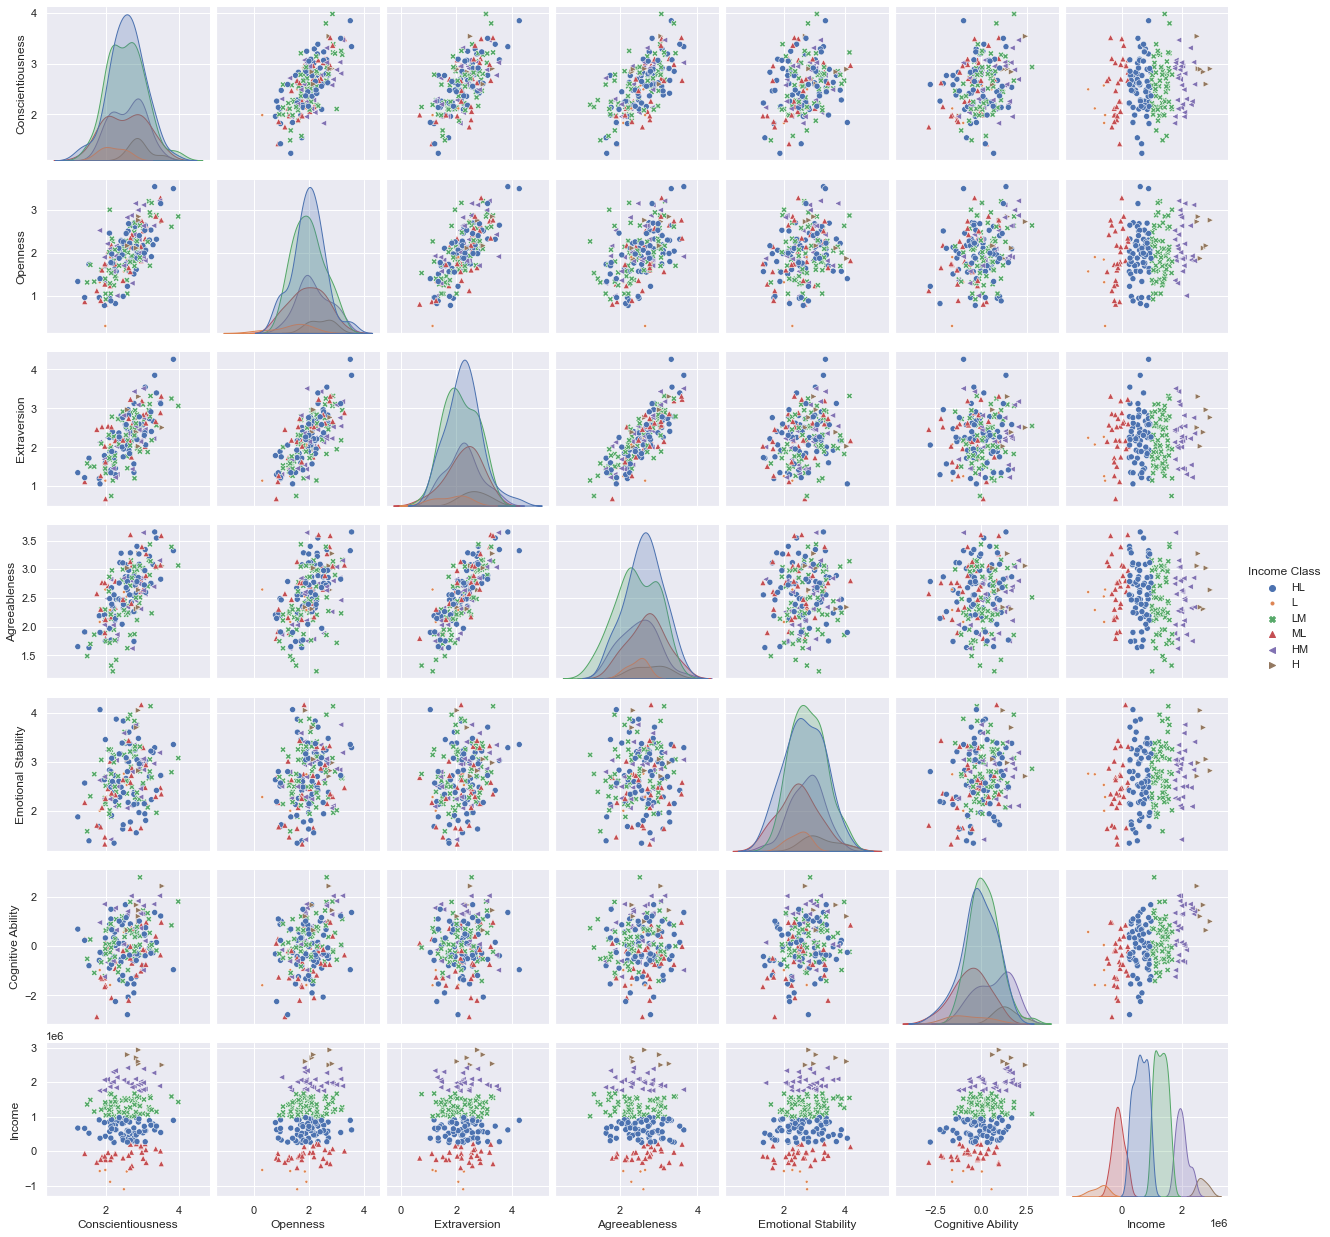

In [151]:
# seaborn for pairplot
import seaborn as sns
# sns.set() to make it look nice
sns.set()
sns.pairplot(df, hue='Income Class', markers=['o', '.', 'X', '^', '<', '>']);

A plot divided using gender is given as follows:

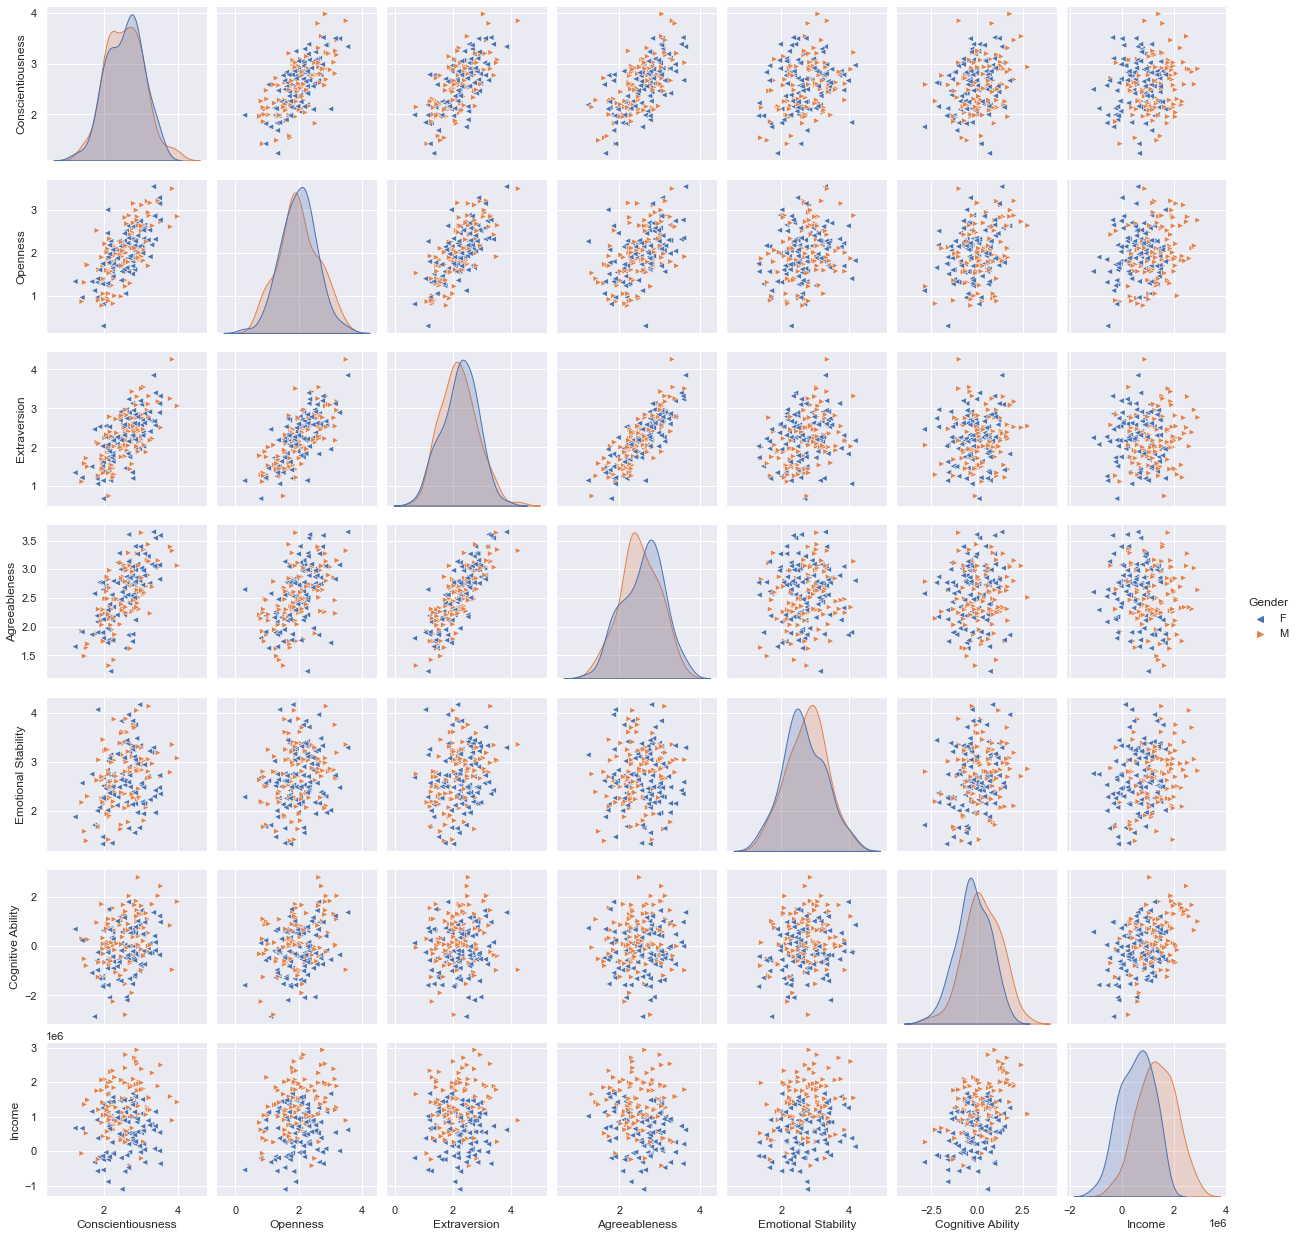

In [152]:
sns.pairplot(df, hue='Gender', markers=['<', '>']);

## 4 References<a name="references"></a>

[1] Duckworth, A., Weir, D., Tsukayama, E. and Kwok, D., 2012. Who Does Well in Life? Conscientious Adults Excel in Both Objective and Subjective Success. Frontiers in Psychology, 3. <a name="ref1"></a> <br>
[2]  Doi.apa.org. 2020. APA Psycnet. [online] Available at: <https://doi.apa.org /doiLanding?doi=10.1037%2F0003-066X.51.2.77> [Accessed 26 November 2020]. <a name="ref2"></a> <br>
[3] Psychology.emory.edu. 2020. Interval. [online] Available at: <http://www.psychology.emory.edu/clinical/bliwise/Tutorials/SOM/smmod/scalemea/print2.htm> [Accessed 26 November 2020]. <a name="ref3"></a> <br>
[4] Psychology Today. 2020. Big 5 Personality Traits. [online] Available at: <https://www.psychologytoday.com/ie/basics/big-5-personality-traits> [Accessed 26 November 2020]. <a name="ref4"></a> <br>
[5] Reflectd. 2020. A Look Into Personality And The Big Five Personality Traits. [online] Available at: <https://reflectd.co/2013/03/22/what-is-personality-does-it-change/> [Accessed 26 November 2020]. <a name="ref5"></a> <br>
[6] Ortiz-Ospina, E., Tzvetkova, S. and Roser, M., 2020. Women’S Employment. [online] Our World in Data. Available at: <https://ourworldindata.org/female-labor-supply> [Accessed 11 December 2020]. <a name="ref6"></a> <br>
[7] Numpy.org. 2020. Numpy.Random.Multivariate_Normal — Numpy V1.19 Manual. [online] Available at: <https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html> [Accessed 26 November 2020]. <a name="ref7"></a> <br>
[8] list, P., Nanda, S. and L&#243;pez, R., 2020. Pretty Print 2D Python List. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/13214809/pretty-print-2d-python-list> [Accessed 26 November 2020]. <a name="ref8"></a> <br>
[9] Statistics How To. 2020. Z-Score: Definition, Formula And Calculation - Statistics How To. [online] Available at: <https://www.statisticshowto.com/probability-and-statistics/z-score/> [Accessed 2 December 2020].<a name="ref9"></a> <br>
[10] Tamborini, C., Kim, C. and Sakamoto, A., 2015. Education and Lifetime Earnings in the United States. Demography, 52(4), pp.1383-1407. <a name="ref10"></a> <br>
[11] Unf.edu. 2020. [online] Available at: <https://www.unf.edu/~cwinton/html/cop4300/s09/class.notes/DiscreteDist.pdf> [Accessed 11 December 2020]. <a name="ref11"></a> 